# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [21]:
import pandas as pd
df_1 = pd.read_csv("twitter-archive-enhanced.csv")

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [22]:
df_2 = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv', sep='\t')


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [23]:
df_3 = pd.read_json('tweet-json.txt', orient = 'records', dtype=True, lines=True)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [24]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Text(0,0.5,'Columns')

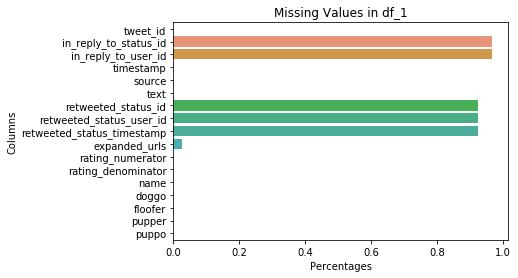

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
# plt.figure(figsize=(10,6))

sns.barplot(x = df_1.isna().mean(), y = df_1.columns )
plt.title('Missing Values in df_1')
plt.xlabel('Percentages')
plt.ylabel('Columns')


In [26]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
df_2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [28]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [29]:
df_3.isna().mean()

contributors                     1.000000
coordinates                      1.000000
created_at                       0.000000
display_text_range               0.000000
entities                         0.000000
extended_entities                0.119371
favorite_count                   0.000000
favorited                        0.000000
full_text                        0.000000
geo                              1.000000
id                               0.000000
id_str                           0.000000
in_reply_to_screen_name          0.966865
in_reply_to_status_id            0.966865
in_reply_to_status_id_str        0.966865
in_reply_to_user_id              0.966865
in_reply_to_user_id_str          0.966865
is_quote_status                  0.000000
lang                             0.000000
place                            0.999575
possibly_sensitive               0.060748
possibly_sensitive_appealable    0.060748
quoted_status                    0.988105
quoted_status_id                 0

### First we drop the rows for 


1-in_reply_to_status_id      
2-in_reply_to_user_id  
3-retweeted_status_id           
4-retweeted_status_user_id      
5-retweeted_status_timestamp  

In [30]:
import numpy as np
list1 = np.where(df_1['retweeted_status_user_id'].notnull())[0]

In [31]:
list2 = np.where(df_1['in_reply_to_status_id'].notnull())[0]

In [32]:
resultList= list(set(list1) | set(list2))

In [33]:
df_1.drop(resultList, inplace = True)

In [34]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

#### Then we handle the columns if the Quality issues section.


### Quality issues
1.A lot of Null values in df_1

2.None should be NaN in df_1

3.Delete non nesseccary columns in df_1, and df_3

4.p1_dog, p2_dog, and p3_dog all false are useless

5.rating_denominator should not be greater than 10

6.there should not be two columns for some column, and the same column_str, it should be converted to str when needed

7.in df_2 Dogs names should be conssiestent, always starting with a capital letter 

8.delete duplicated values in jpg_id in df_2

### Tidiness issues
1.Tweet_id columns must has the same naming so megring the data is a lot easier.

2.all three dataframes should be merged into one.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [35]:
# Make copies of original pieces of data
df1_copy = df_1.copy()
df2_copy = df_2.copy()
df3_copy = df_3.copy()


### Issue #1: 
Dealing with null values

#### Define:
The dataframe has 11140 missing

#### Code

In [36]:
df1_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], axis =1 , inplace= True)

#### Test

In [37]:
df1_copy.isna().sum().sum()

0

### Issue #2:
Replacing None values with null.

#### Define
in the dataframe we have a lot of 'None' values, a good idea might be converting those values to null values to handle them more effiecntly

#### Code

In [38]:
import numpy as np
df1_copy = df1_copy.replace({'None': np.NaN})

In [39]:
df1_copy.drop('name', axis = 1, inplace = True)

In [40]:
df1_copy.fillna(0, inplace = True)

In [41]:
df1_copy.isna().sum()

tweet_id              0
timestamp             0
source                0
text                  0
rating_numerator      0
rating_denominator    0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

#### Test

In [42]:
df1_copy[df1_copy.eq('None').any(1)]


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo


### Issue #3:
Delete unecassary columns in df1, df3


In [43]:
df3_copy.drop(['place', 'retweeted_status', 'quoted_status', 'quoted_status_id', 'quoted_status_id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str','geo', 'contributors', 'coordinates', 'possibly_sensitive_appealable', 'possibly_sensitive'], axis = 1, inplace = True)

In [44]:
df3_copy.dropna(inplace = True)

In [45]:
df3_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2353
Data columns (total 16 columns):
created_at            2073 non-null datetime64[ns]
display_text_range    2073 non-null object
entities              2073 non-null object
extended_entities     2073 non-null object
favorite_count        2073 non-null int64
favorited             2073 non-null bool
full_text             2073 non-null object
id                    2073 non-null int64
id_str                2073 non-null int64
is_quote_status       2073 non-null bool
lang                  2073 non-null object
retweet_count         2073 non-null int64
retweeted             2073 non-null bool
source                2073 non-null object
truncated             2073 non-null bool
user                  2073 non-null object
dtypes: bool(4), datetime64[ns](1), int64(4), object(7)
memory usage: 218.6+ KB


### Issue #4:

probablites do not sum to 1


In [46]:
df2_copy.drop(df2_copy.loc[(df2_copy.p1_dog == False) & (df2_copy.p2_dog == False) & (df2_copy.p3_dog == False)].index, inplace = True)

### Issue #5:

rating_denominator should not be greater than 10

In [47]:
df1_copy.drop(df1_copy.loc[(df1_copy.rating_denominator > 10)].index, inplace = True)

In [48]:
(df1_copy.rating_denominator > 10).sum()

0

### Issue #6:
There is no need for chaning each columns type as a new column.

In [49]:
df3_copy.drop(['id_str'], axis = 1, inplace = True)

In [50]:
df3_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2353
Data columns (total 15 columns):
created_at            2073 non-null datetime64[ns]
display_text_range    2073 non-null object
entities              2073 non-null object
extended_entities     2073 non-null object
favorite_count        2073 non-null int64
favorited             2073 non-null bool
full_text             2073 non-null object
id                    2073 non-null int64
is_quote_status       2073 non-null bool
lang                  2073 non-null object
retweet_count         2073 non-null int64
retweeted             2073 non-null bool
source                2073 non-null object
truncated             2073 non-null bool
user                  2073 non-null object
dtypes: bool(4), datetime64[ns](1), int64(3), object(7)
memory usage: 202.4+ KB


### Issue #7:
Naming should be consistent in df_2

In [51]:
df2_copy['p1'] = df2_copy['p1'].str.capitalize()
df2_copy['p2'] = df2_copy['p2'].str.capitalize()
df2_copy['p3'] = df2_copy['p3'].str.capitalize()

###  Issue #8:
remove dupliacated values in df2_copy

In [52]:
df2_copy.drop_duplicates(subset = 'jpg_url', inplace = True)

In [53]:
(df2_copy.jpg_url.duplicated()).sum()

0

### Tidiness #1:
tweet_id columns must has the same naming so megring the data is a lot easier.


In [54]:
df3_copy.rename(columns={"id": "tweet_id"}, inplace=True)

### Tidiness #2:
all three dataframes should be merged into one dataframe.


In [55]:
df1_df2 = pd.merge(df1_copy, df2_copy, how='inner',on='tweet_id')
full_df = pd.merge(df1_df2, df3_copy, how = 'inner', on ='tweet_id')

timestamp should be datatime

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [56]:
full_df.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

In [57]:
full_df.drop('retweeted', axis = 1, inplace = True)

In [58]:
full_df['timestamp'] = pd.to_datetime(full_df['timestamp'])

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [59]:
full_df.lang.value_counts()

en    1647
nl       3
eu       1
et       1
Name: lang, dtype: int64

In [60]:
full_df['retweet_count'].idxmax()

684

In [61]:
full_df.p1.value_counts()[:5]

Golden_retriever      135
Labrador_retriever     91
Pembroke               88
Chihuahua              78
Pug                    54
Name: p1, dtype: int64

### Insights:
1. Golden_retriever is the most first preditcion 

2. English Language is the most popular language in the dataframe

3. Tweet index 692 has the most retweet count 79515

### Visualization

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5,0,'Rating Numerator ')

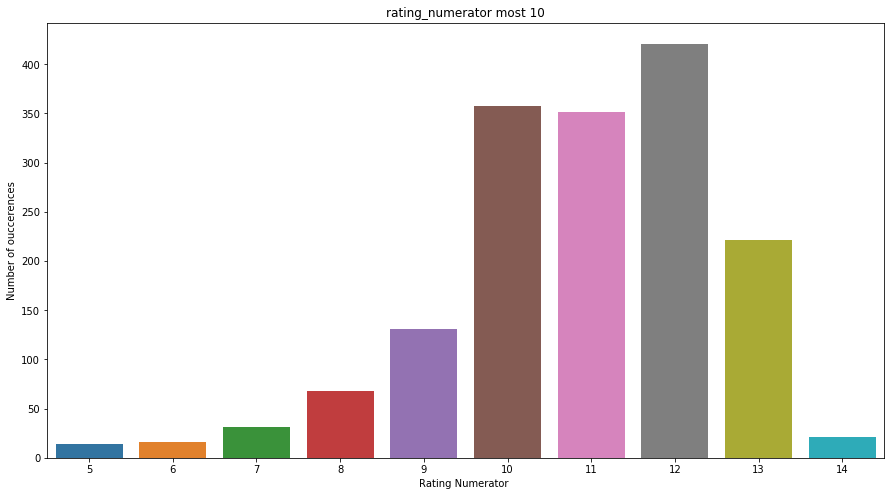

In [63]:
plt.figure(figsize = (15,8))
ax = sns.barplot(full_df['rating_numerator'].value_counts()[0:10].index,
            full_df['rating_numerator'].value_counts()[0:10]);
plt.title("rating_numerator most 10")
plt.ylabel('Number of ouccerences')
plt.xlabel('Rating Numerator ')

In [64]:
full_df['timestamp'][0].year

2017

In [65]:
full_df['year'] = full_df['timestamp'].dt.year


In [66]:
full_df['month'] = full_df['timestamp'].dt.month


In [67]:
full_df['month'].value_counts()

12    333
11    269
1     194
2     151
3     145
7     123
6     108
5      83
4      81
10     60
9      57
8      48
Name: month, dtype: int64

Text(0.5,0,'Year')

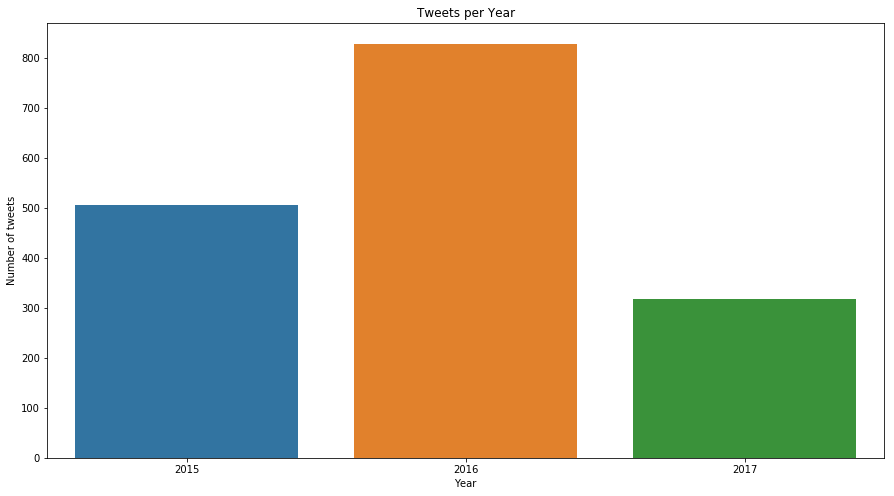

In [68]:
plt.figure(figsize = (15,8))
ax = sns.barplot(full_df['year'].value_counts().index,
            full_df['year'].value_counts());
plt.title("Tweets per Year")
plt.ylabel('Number of tweets')
plt.xlabel('Year')

In [69]:
len(full_df.text[0])

162

In [70]:
full_df['len']  = full_df['text'].str.len()

In [71]:
full_df['len'].mean()

122.20581113801452